In [8]:
# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [9]:
# Creating a DataFrame
df = pd.DataFrame(data)

# Computing the distribution of class labels
class_label_distribution = df['ADHD Measure'].value_counts(normalize=True)

# Printing the distribution
print(class_label_distribution)

1    0.592593
0    0.327160
2    0.080247
Name: ADHD Measure, dtype: float64


        PC1       PC2  ADHD Measure
0  0.336372 -0.768343             1
1  0.336372 -0.768343             1
2 -0.118693 -1.071844             1
3  1.246501 -0.161341             1
4  0.336372 -0.768343             1
Model Accuracy: 0.8181818181818182
Precision: 0.7356902356902357
Recall: 0.7000000000000001


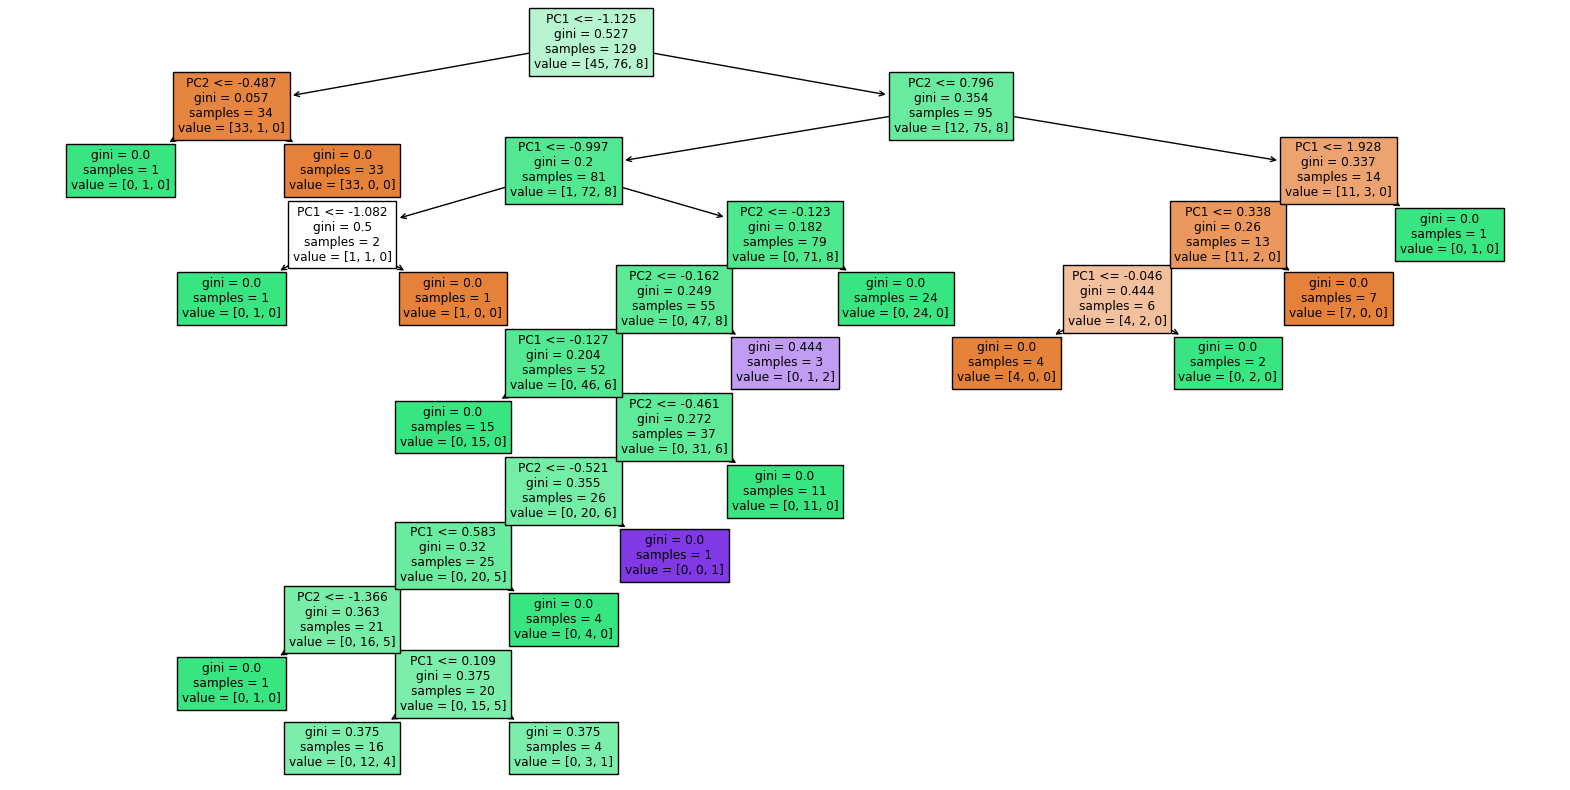

In [12]:


# 2. Load the Dataset
data = pd.read_csv('../data/01-modified-data/combined_data_pca.csv')  # Replace 'your_dataset.csv' with your file path

# 3. Explore the Data
print(data.head())  # This shows the first few rows of the dataset

# 4. Prepare the Data
X = data.drop('ADHD Measure', axis=1)  # Replace 'target_column' with the name of your target column
y = data['ADHD Measure']  # This is what we want to predict

# 5. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 80% training and 20% testing

# 6. Create and Train the Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 7. Make Predictions and Evaluate the Model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

# Calculate precision and recall
precision = precision_score(y_test, predictions, average='macro') # For multiclass, use 'macro' or 'weighted'
recall = recall_score(y_test, predictions, average='macro')

# Print precision and recall
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# 8. Visualize the Decision Tree (Optional)
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

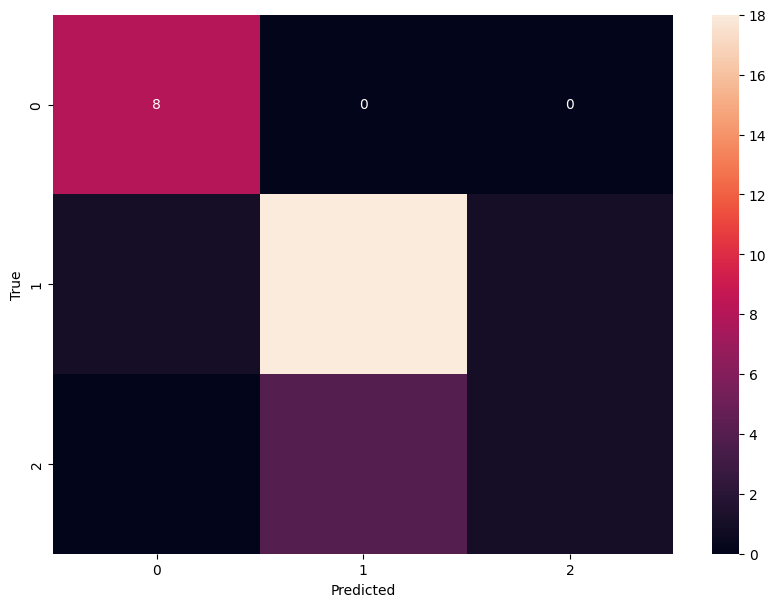

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the responses for the test dataset
#y_pred = clf.predict(X_test)

# Creating the confusion matrix
cm = confusion_matrix(y_test, predictions)


# Using seaborn to create a more informative confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [2]:
import pandas as pd
data = pd.read_csv('../data/01-modified-data/combined_data_pca.csv')


In [4]:
from sklearn.model_selection import train_test_split

X = data.drop('ADHD Measure', axis=1)  # replace 'target_column' with the name of your target column
y = data['ADHD Measure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 80% training, 20% testing

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [6]:
predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.9393939393939394


In [9]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')  # save
model = joblib.load('random_forest_model.pkl')  # load

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score


# 4. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 5. Create and Train the XGBoost Model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 6. Make Predictions and Evaluate the Model
predictions = model.predict(X_test)
print(predictions)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

# 7. Parameter Tuning (Optional)
# model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
# model.fit(X_train, y_train)
# Adjust n_estimators, max_depth, and learning_rate as needed

[1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 2 2 1 0 1 1 0 0 0 1 0]
Model Accuracy: 0.7878787878787878
